In [39]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">VER CODIGO</button>''', raw=True)

VER CODIGO

In [40]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn 
seaborn.set() 
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [41]:
df = pd.read_excel('procesados.xls')
df.head()

,DATE,SIZE,LABEL,TYPE
0,2015-11-19,396667,APROBACION,pdf
1,2015-08-06,76634,NOTIFICACIONES,pdf
2,2015-11-19,71680,AUTORIZACIONES,doc
3,2016-02-15,113461,SELECCIONES,pdf
4,2016-01-20,270440,SELECCIONES,pdf


In [42]:
# AGRUPACIONES

porlabel = df.groupby("LABEL")

portipo = df.groupby("TYPE")

In [43]:
numerodelabels = porlabel["LABEL"].count()
cntlabels = len(numerodelabels)
print 'Hay %s etiquetas de documento distintas en total.' %cntlabels

Hay 12 etiquetas de documento distintas en total.


In [44]:
print ' Listado de etiquetas por frecuencia descendente.'
numerodelabels.sort_values(ascending = False)

 Listado de etiquetas por frecuencia descendente.


LABEL
NOTIFICACIONES    10524
SELECCIONES        8873
ORDENAMIENTO       3334
AUTORIZACIONES     3332
OTROS              3187
CONTABILIZADO      1241
APROBACION         1187
RECORDATORIO       1011
AVERIGUACION        755
ADMINISTRACION      478
ACTIVIDADES         100
CADUCIDAD            36
Name: LABEL, dtype: int64

In [45]:
# Por tipos
numerodetipos = portipo["TYPE"].count()
cnttipos = len(numerodetipos)
print 'Hay %s tipos de fichero distintos en total.' %cnttipos


Hay 18 tipos de fichero distintos en total.


In [46]:
numerodetipos.sort_values(ascending= False)

TYPE
pdf     28915
rtf      1883
doc      1675
docx     1083
msg       423
tif        32
html        8
iles        4
TIF         4
JPG         4
htm         4
odt         3
jpg         3
xls         3
dot         3
xlsx        2
txt         1
DOCX        1
Name: TYPE, dtype: int64

In [47]:
ordenadoL = numerodelabels.sort_values(ascending = False)
ordenadodL= pd.DataFrame(ordenadoL)
ordenadodL.columns = ['FREQ']
ordenadodL.reset_index()

,LABEL,FREQ
0,NOTIFICACIONES,10524
1,SELECCIONES,8873
2,ORDENAMIENTO,3334
3,AUTORIZACIONES,3332
4,OTROS,3187
5,CONTABILIZADO,1241
6,APROBACION,1187
7,RECORDATORIO,1011
8,AVERIGUACION,755
9,ADMINISTRACION,478


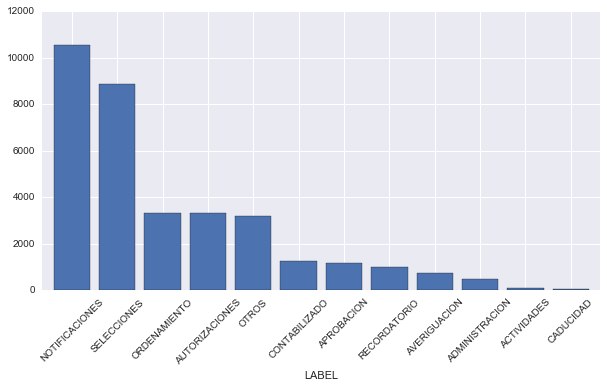

In [48]:
# dfporL.plot(kind="barh", width=0.9, figsize=(20,15))
g = ordenadoL.plot(kind='bar', legend = False, width = .8, figsize = (10,5))
plt.xticks(rotation=45)
plt.show()

In [49]:
ordenadoT = numerodetipos.sort_values(ascending = False)
print "Tipos de archivo por frecuencia"
ordenadodT= pd.DataFrame(ordenadoT)
ordenadodT.columns = ['FREQ']
ordenadodT.reset_index()

Tipos de archivo por frecuencia


,TYPE,FREQ
0,pdf,28915
1,rtf,1883
2,doc,1675
3,docx,1083
4,msg,423
5,tif,32
6,html,8
7,iles,4
8,TIF,4
9,JPG,4


Vemos que el grueso del tipo de archivo es PDF con mucha diferencia.


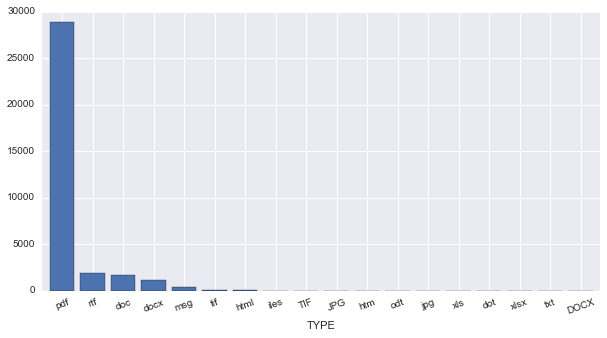

In [50]:
# ordenadoT.plot(kind="bar", legend="false")
print "Vemos que el grueso del tipo de archivo es PDF con mucha diferencia."
g2 = ordenadoT.plot(kind='bar', legend = False, width = .8, figsize = (10,5))
plt.xticks(rotation=20)
plt.show()

In [51]:
porfecha = df.groupby("DATE")
numerodedias = porfecha["DATE"].count()
cntdias = len(numerodedias)
print 'Hay %s fechas distintas en total. Vemos las 10 mas frecuentes.' %cntdias
ordenadoD = numerodedias.sort_values(ascending = False)
ordenadoDT= pd.DataFrame(ordenadoD)
ordenadoDT.columns = ['FREQ']
#ordenadoDT = ordenadoD.reset_index()
ordenadoDT.head(10)

Hay 209 fechas distintas en total. Vemos las 10 mas frecuentes.


,FREQ
DATE,
2015-08-10,472
2015-08-11,448
2015-08-12,430
2015-07-06,422
2015-07-29,419
2015-08-13,380
2015-09-29,370
2016-01-19,369
2015-07-07,354


Plot con la evolución temporal del total de documentos incluidos en el sistema.


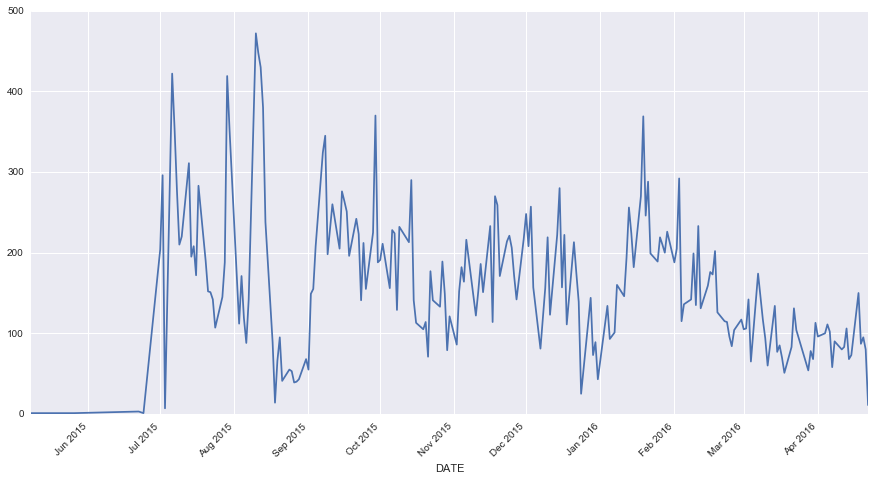

In [52]:
print "Plot con la evolución temporal del total de documentos incluidos en el sistema."

gf = ordenadoDT.plot(kind='line', legend = False, figsize = (15,8))
plt.xticks(rotation=45)
plt.show()

## Comunicados estos datos preliminares, los responsables deciden lo siguiente:

 ### Se restringe el proceso de clasificación a los 4 formatos más frecuentes:
 
     - pdf
     - doc
     - docx
     - rtf
 
